# Phishing Website Detection By Machine Learning Techniques

# Objective:
A phishing website is a common social engineering method that mimics trustful uniform resource locators(URLs) and webpages.The objective of this project is to train machine learning models on the dataset created to predict phising websites.Both phising and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted.The performance level of each model is measures and compared.

# Loading Data:

In [1]:
#Importing Basic Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.ensemble import StackingClassifier


In [2]:
#Loading the data
data0 = pd.read_csv('5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# Familiarizing with data

In this step, few dataframe methods are used to look into the data and its features

In [3]:
#Checking the shape of the datatset
data0.shape

(10000, 18)

In [4]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# Visualizing the data
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

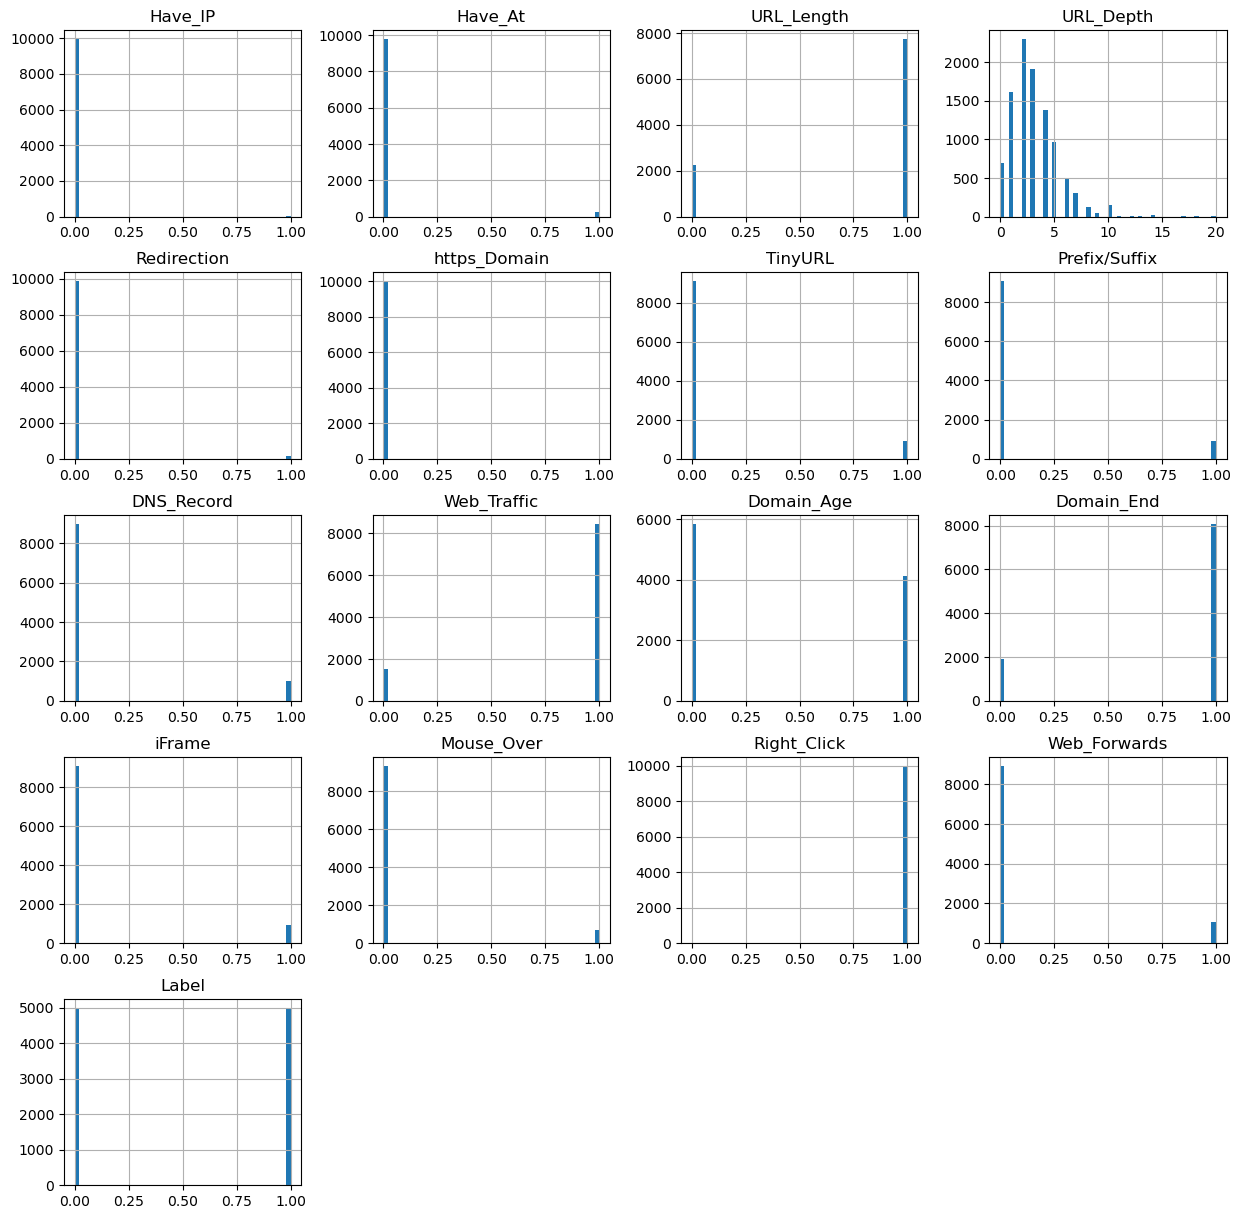

In [6]:
#Plotting the data distribution 
data0.hist(bins=50,figsize=(15,15))
plt.show()

# Data Preprocessing & EDA

Here,we clean the data by applying data preprocessing techniques and transform the data to use it in the models.

In [7]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [8]:
#Dropping the Domain column
data = data0.drop(['Domain','Web_Traffic'],axis=1).copy()

This leaves us with 16 features & a target column.The 'URL_Depth' maximum value is 20.According to my understanding,there is no necessity to change this column.

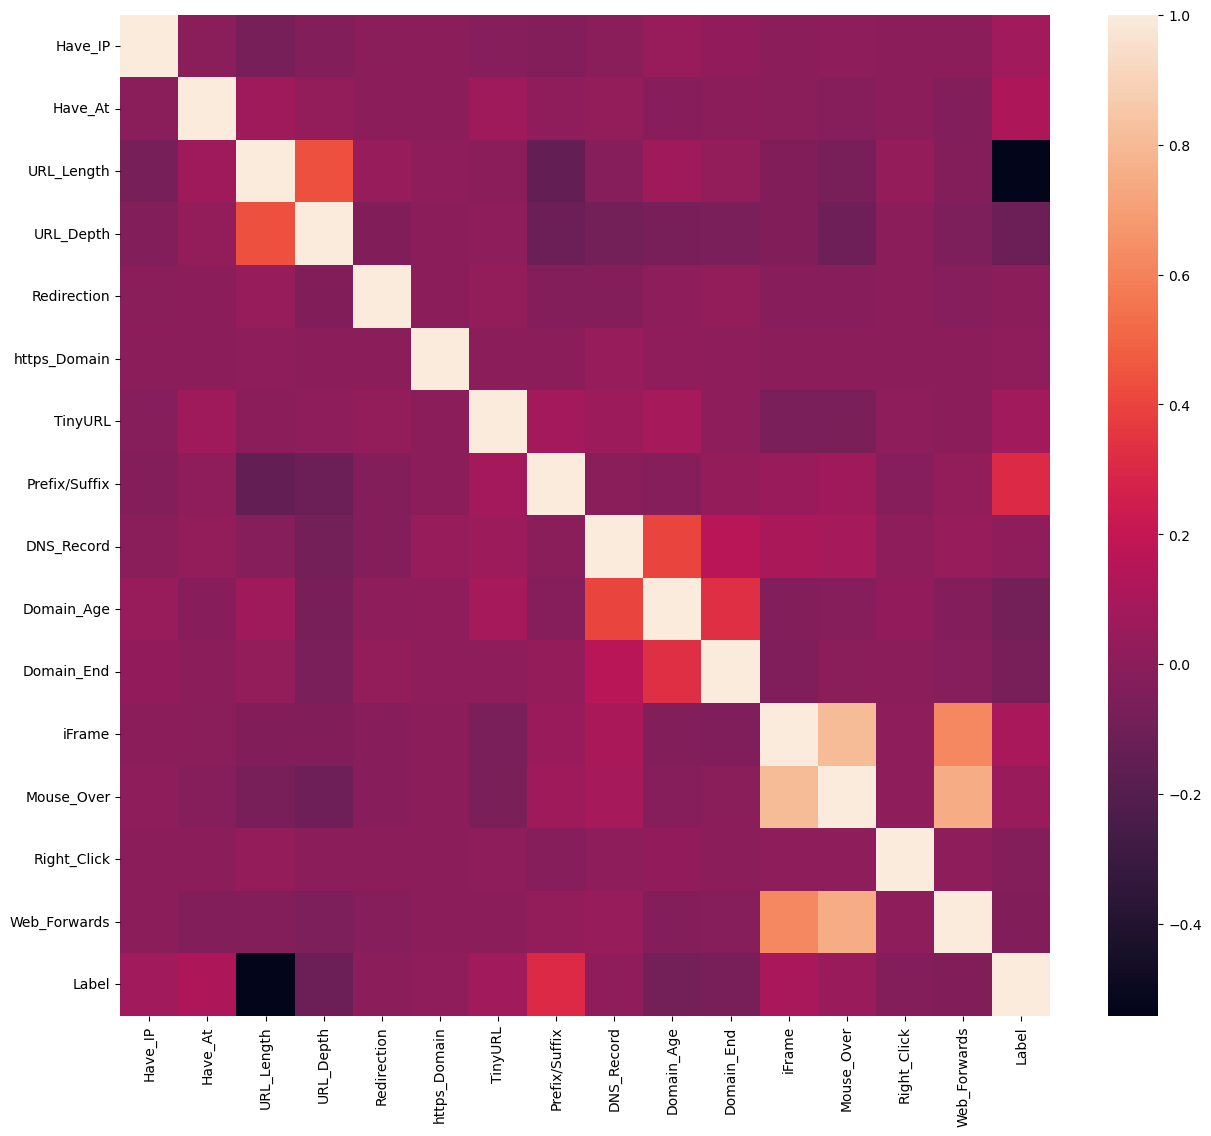

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

In [10]:
#Checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1
1,0,0,0,3,0,0,0,1,1,1,1,0,0,1,0,1
2,0,0,1,3,0,0,1,0,0,0,1,0,0,1,0,0
3,0,0,1,10,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1


From the above execution, it is clear the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training

# Splitting the data 

In [12]:
#Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 15), (10000,))

In [13]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 15), (2000, 15))

# Machine Learning Models & Training

From the dataset above,it is clear that this is a supervised machine learning task.There are two major types of supervised machine learning problems,
called classification and regression.


This data set comes under classification problem, as the input URL is classified as phising (1) or legitimate (0). The supervised machine learning
models (classifiaction) considered to train the dataset in this notebook are:

1. Decision Tree
2. Random Forest
3. XGBoost
4. Support Vector Machines

In [14]:
#importing packages
from sklearn.metrics import accuracy_score

In [15]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# Decision Tree Classifier

In [16]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [17]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

### Performance Evaluation:

In [18]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.802
Decision Tree: Accuracy on test Data: 0.786


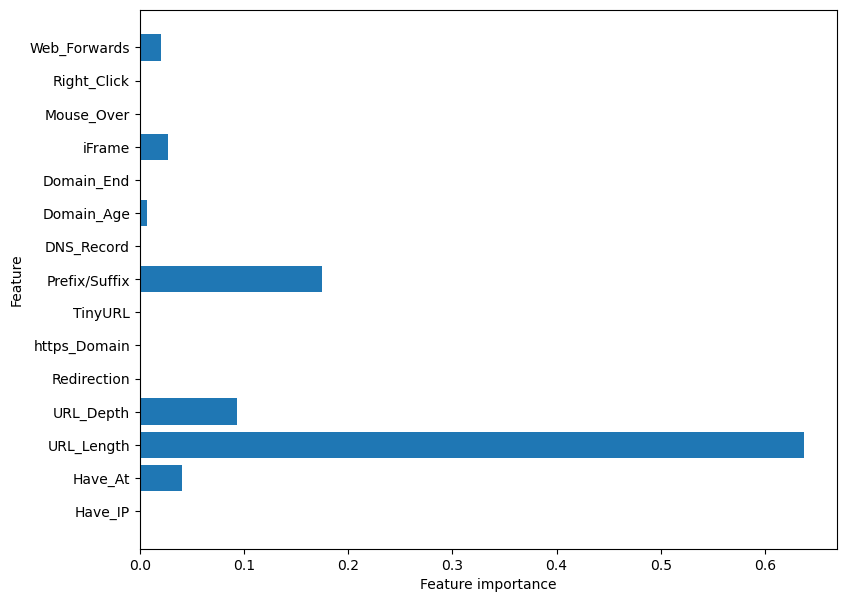

In [19]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Storing the results:

In [20]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Executed only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Random Forest Classifier

In [21]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [22]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

### Performance Evaluation:

In [23]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.812
Random forest: Accuracy on test Data: 0.796


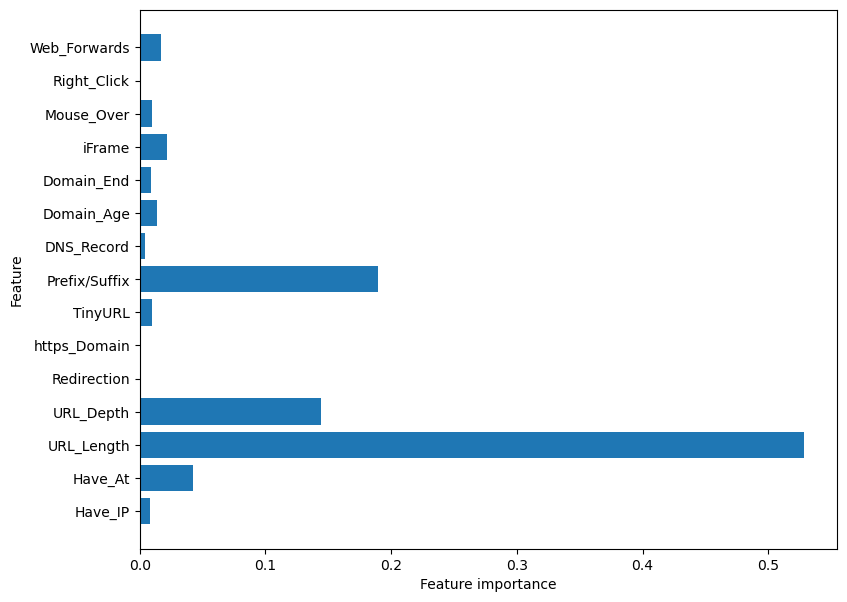

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Storing the results:

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# XGBoost Classifier

In [26]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

### Performance Evaluation:

In [28]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.857
XGBoost : Accuracy on test Data: 0.839


### Storing the results:

In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

# Support Vector Machines

In [30]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [31]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

### Performance Evaluation:

In [32]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.806
SVM : Accuracy on test Data: 0.786


### Storing the results:

In [33]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

# Comparison of Models

To compare the models performance, a dataframe is created.The columns of this dataframe are the lists created to store the results of the model.

In [34]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.802,0.786
1,Random Forest,0.812,0.796
2,XGBoost,0.857,0.839
3,SVM,0.806,0.786


In [35]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,0.857,0.839
1,Random Forest,0.812,0.796
3,SVM,0.806,0.786
0,Decision Tree,0.802,0.786


##### From the above comparison,it is clear that XGBoost Classifier works well this dataset.
##### So,saving the model for future use.

In [36]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))

# Loading the saved model:

In [37]:
# load model from file
loaded_model = pickle.load(open("model.pkl", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Predicting the outcome by our Model

In [38]:
loaded_model.predict(np.array([0 ,0, 0,	3,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0]).reshape(1,15))

array([1])

# CREATING A HYBRID MODEL

In [39]:
## Initiating support vector classifier
classifier= SVC(kernel='linear', C=1.0, random_state=12)

In [40]:
### Creating list of estimators
estimators=[('rf',forest),
            ('dt',tree),
            ('svm',svm),
            ('xgb',xgb)]

In [41]:
### Creating a StackingClassifier object
ensembler=StackingClassifier(estimators=estimators, final_estimator=classifier)
### Fitting the hybrid model
ensembler.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=5)),
                               ('dt', DecisionTreeClassifier(max_depth=5)),
                               ('svm', SVC(kernel='linear', random_state=12)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorica...
                                              interaction_constraints=None,
                                              learning_rate=0.4, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=7,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=SVC(kernel='linear', random_state=12))

## Performance evulation

In [42]:
#predicting the target value from the model for the samples

y_test_ens = svm.predict(X_test)
y_train_ens = svm.predict(X_train)

In [43]:
#computing the accuracy of the model performance

acc_train_ens = accuracy_score(y_train,y_train_ens)
acc_test_ens = accuracy_score(y_test,y_test_ens)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_ens))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_ens))

SVM: Accuracy on training Data: 0.806
SVM : Accuracy on test Data: 0.786


In [44]:
import pickle
pickle.dump(ensembler,open('ensemble.pkl','wb'))

## Now, we will try NLP(natural language processing) approach

## Importing libraries

In [45]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline

import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


#### Loading Data


In [74]:
phishurl=pd.read_csv('phishurl.csv')
phishurl.head()
                    

,url
0,http://confirmprofileaccount.com/
1,http://www.marreme.com/MasterAdmin/04mop.html
2,http://modsecpaststudents.com/review/
3,https://docs.google.com/forms/d/e/1FAIpQLScL6L...
4,https://oportunidadedasemana.com/americanas//?...


In [75]:
legiurl=pd.read_csv('legiurl.csv')
legiurl.head()

,url
0,http://extratorrent.cc/torrent/4190976/V.A.+-+...
1,http://techcrunch.com/2015/04/09/soundcloud-st...
2,http://icicibank.com/Personal-Banking/offers/o...
3,http://xhamster.com/movies/4570370/this_sexy_e...
4,http://jezebel.com/this-week-in-tabloids-kim-k...


### Data preprocessing

In [76]:
phishurl['label']='bad'
phishurl.head()

,url,label
0,http://confirmprofileaccount.com/,bad
1,http://www.marreme.com/MasterAdmin/04mop.html,bad
2,http://modsecpaststudents.com/review/,bad
3,https://docs.google.com/forms/d/e/1FAIpQLScL6L...,bad
4,https://oportunidadedasemana.com/americanas//?...,bad


In [77]:
legiurl['label']='good'
legiurl.head()

,url,label
0,http://extratorrent.cc/torrent/4190976/V.A.+-+...,good
1,http://techcrunch.com/2015/04/09/soundcloud-st...,good
2,http://icicibank.com/Personal-Banking/offers/o...,good
3,http://xhamster.com/movies/4570370/this_sexy_e...,good
4,http://jezebel.com/this-week-in-tabloids-kim-k...,good


In [78]:
urldata = pd.concat([legiurl, phishurl]).reset_index(drop=True)
urldata.head()

,url,label
0,http://extratorrent.cc/torrent/4190976/V.A.+-+...,good
1,http://techcrunch.com/2015/04/09/soundcloud-st...,good
2,http://icicibank.com/Personal-Banking/offers/o...,good
3,http://xhamster.com/movies/4570370/this_sexy_e...,good
4,http://jezebel.com/this-week-in-tabloids-kim-k...,good


## Preprocessing

Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.

#### Regexp Tokenizer
A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [79]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [80]:
# this will pull letter which matches to expression

tokenizer.tokenize(urldata.url[0])#using first row

['http',
 'extratorrent',
 'cc',
 'torrent',
 'V',
 'A',
 'Blues',
 'Giants',
 'Live',
 'Vol',
 'CD',
 'Box',
 'BFLAC',
 'D',
 'html']

In [81]:
print('Getting words tokenized ...')
t0= time.perf_counter()
urldata['text_tokenized'] = urldata.url.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.05551089998334646 sec


## SnowballStemmer
Snowball is a small string processing language, gives root words

In [82]:
stemmer = SnowballStemmer("english")

In [83]:
print('Getting words stemmed ...')
t0= time.perf_counter()
urldata['text_stemmed'] = urldata['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 1.5082191000692546 sec


In [84]:
print('Getting joiningwords ...')
t0= time.perf_counter()
urldata['text_sent'] = urldata['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')


Getting joiningwords ...
Time taken 0.007924600038677454 sec


## Creating Model

### CountVectorizer
CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [85]:
#Create cv object
cv = CountVectorizer()

In [86]:
feature = cv.fit_transform(urldata.text_sent)

In [87]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
#### Splitting the data

In [89]:
trainX, testX, trainY, testY = train_test_split(feature, urldata.label)

# LogisticRegression
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [90]:
#creating lr object
lr = LogisticRegression()

In [91]:
#traing the model
lr.fit(trainX,trainY)

LogisticRegression()

In [92]:
#predicting the target value
lr.score(testX,testY)

0.9836457917830076

In [112]:
## Now we are creating sklearn pipeline using logistic Regression
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [113]:

trainX, testX, trainY, testY = train_test_split(urldata.url, urldata.label)

In [114]:
# again training the logisticRegression pipeline model
pipeline_ls.fit(trainX,trainY)

C:\Users\punya\project\env\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [115]:
#predicting the score
pipeline_ls.score(testX,testY) 

0.9836457917830076

In [116]:
#saving the model
pickle.dump(pipeline_ls,open('lspipe.pkl','wb'))

In [117]:
#loading the model
loaded_model2= pickle.load(open('lspipe.pkl', 'rb'))
result = loaded_model2.score(testX,testY)
print(result)

0.9836457917830076


In [118]:
# predicting on list or urls
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model3 = pickle.load(open('lspipe.pkl', 'rb'))
result = loaded_model3.predict(predict_bad)
result2 = loaded_model3.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['bad' 'good' 'bad' 'bad']
